In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [58]:
np.random.seed(12121)
mu_1 = 0.5
sigma_1 = 0.2

mu_2 = 0.2
sigma_2 = 0.4

n = 50
N = 100
q = 2

def A_q(q):
    if q == 1:
        return np.sqrt(2*np.pi)
    elif q > 1 and q <3:
         return np.sqrt((3-q)/(q-1)) * np.random.beta((3-q)/(2*(q-1)), 1/2)


def q_gaussian(x, q, mu, sigma):
    """ 
    Generate random values following a q-Gaussian distribution
    """
    A = A_q(q)
    xi = - ((x-mu)**2/(3-q)*sigma**2)
    exp_xi = (1+ (1-q)*xi)**(1/(1-q))
    return 1/(A) * exp_xi

def mu_hat(a):
    n = len(a)
    return np.sum(a)/n

def sigma_hat(a, mu_hat):
    n = len(a)
    return (1/(n-1))* np.sum([(ai -mu_hat)**2 for ai in a])

x = np.random.uniform(0,1,n)


F_1 = np.zeros((N,2))
F_2 = np.zeros((N,2))


for i in range(N):
    a = q_gaussian(x, q, mu_1, sigma_1)
    mu_hat_1 = mu_hat(a)
    sigma_hat_1 = sigma_hat(a, mu_hat_1)
    F_1 [i,:] = [mu_hat_1, sigma_hat_1]

    b = q_gaussian(x, q, mu_2, sigma_2)

    mu_hat_2 = mu_hat(b)
    sigma_hat_2 = sigma_hat(b, mu_hat_2)
    F_2 [i,:] = [mu_hat_2, sigma_hat_2]




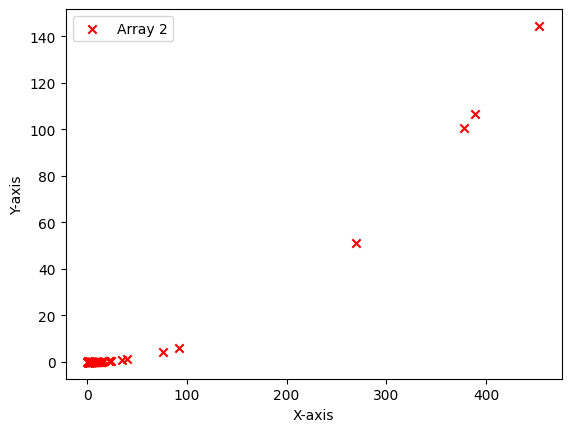

In [65]:
# Extract x and y coordinates from each array
x1, y1 = F_1[:, 0], F_1[:, 1]
x2, y2 =F_2[:, 0],F_2[:, 1]

# Create the plot
plt.scatter(x1, y1, label='Array 1', color='blue', marker='o')
plt.scatter(x2, y2, label='Array 2', color='red', marker='x')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.show()

In [ ]:
def diffusion_kernel(x, y):
    degree = 3  # You can adjust this as needed
    return (np.dot(x, y) + 1) ** degree




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
svm = SVC(kernel=diffusion_kernel, C=1.0)  # You can adjust the hyperparameters as needed
svm.fit(X_train, y_train)


In [25]:
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


NameError: name 'svm' is not defined